## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [170]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [171]:
df = pd.read_csv('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/property_dataset.csv')
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [172]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [174]:
df.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [175]:
df.isnull().sum()/len(df)*100

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [176]:
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [177]:
df.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [178]:
df.drop('Nama Daerah', axis=1, inplace=True)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [179]:
label_encoder = LabelEncoder()
df['Area Category'] = df['Area Category'].map({'Sangat Premium': 1, 'Premium': 2, 'Standard': 3, 'Below Standard': 4})
df['Terjual/Belum'] = df['Terjual/Belum'].map({'Terjual': 0, 'Belum': 1})
df['Arah Hadap Rumah'] = label_encoder.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = label_encoder.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map({'< 1 Mobil': 1, '1-2 Mobil': 2, '> 2 Mobil': 3})
df.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [180]:
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].replace(' ', '10500000000')
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].replace({r'[.,]': ''}, regex=True)

check the data type

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [182]:
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].astype(int)
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].astype(int)
df['Jumlah Kamar'] = df['Jumlah Kamar'].astype(int)
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype(int)
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype(int)
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [183]:
# scaling data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

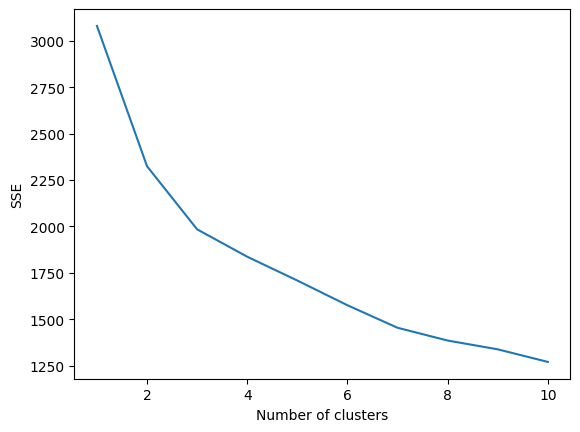

In [184]:
sse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [185]:
kneedle = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
print("The best k for your model is", kneedle.elbow)

The best k for your model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [186]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)

In [187]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_inverse['KMeans'] = y_pred
df_inverse.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [188]:
# Lakukan agregasi
cluster_summary = df_inverse.groupby('KMeans').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)':  ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

# Transpose agar hasilnya menjadi vertikal (baris) dan klaster menjadi kolom
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]

cluster_summary.columns.name = 'KMeans'

# Menampilkan hasil
cluster_summary


KMeans                                      Cluster 0           Cluster 1  \
Area Category                 mode                2.0                 1.0   
                              min                 1.0                 1.0   
                              max                 4.0                 4.0   
Luas Tanah (m2)               mean         187.378205              570.68   
                              min                50.0               240.0   
                              max               525.0              1561.0   
Luas Bangunan (m2)            mean         243.814103              642.22   
                              min                75.0               350.0   
                              max               600.0              1200.0   
Jumlah Kamar                  mode                4.0                 5.0   
                              min                 3.0                 3.0   
                              max                 9.0                13.0   
Jumlah Kamar Mandi            mode                4.0                 5.0   
                              min                 1.0                 2.0   
                              max                 7.0                13.0   
Tingkat/Lantai                mode                2.0                 2.0   
                              min                 1.0                 1.0   
                              max                 3.0                 4.0   
Harga Penawaran (dari Owner)  mean  3544236467.205128  16756299779.959999   
                              min         645000000.0        2750000000.0   
                              max       19500000000.0       99000000000.0   
Terjual/Belum                 mode                1.0                 1.0   
Arah Hadap Rumah              mode                3.0                 3.0   
Posisi Rumah                  mode                2.0                 2.0   
Lebar Jalan Depan Rumah (ROW) mode                2.0                 3.0   

KMeans                                      Cluster 2  
Area Category                 mode                3.0  
                              min                 2.0  
                              max                 4.0  
Luas Tanah (m2)               mean         118.980392  
                              min                14.0  
                              max               495.0  
Luas Bangunan (m2)            mean         117.588235  
                              min                14.0  
                              max               495.0  
Jumlah Kamar                  mode                2.0  
                              min                 1.0  
                              max                 5.0  
Jumlah Kamar Mandi            mode                2.0  
                              min                 1.0  
                              max                 4.0  
Tingkat/Lantai                mode         [1.0, 2.0]  
                              min                 1.0  
                              max                 2.0  
Harga Penawaran (dari Owner)  mean  1506754456.117647  
                              min         160000000.0  
                              max       10500000000.0  
Terjual/Belum                 mode                1.0  
Arah Hadap Rumah              mode                3.0  
Posisi Rumah                  mode                2.0  
Lebar Jalan Depan Rumah (ROW) mode                2.0

In [189]:
# Menghitung jumlah data di setiap klaster
cluster_counts = df_inverse['KMeans'].value_counts().sort_index()
cluster_counts.name = 'KMeans'
cluster_counts

,KMeans
KMeans,
0,156
1,50
2,102


In [190]:
# write down your interpretation from the cluster that you have been made
# Cluster 0:
# Area Category: Mode is 2.0, indicating that the most common area category in Cluster 0 is 2.
# Luas Tanah (Land Area): The average land area in Cluster 0 is relatively small (187.38 m²), with a minimum of 50.0 m² and a maximum of 525.0 m². This suggests that Cluster 0 is associated with smaller plots of land.
# Luas Bangunan (Building Area): The mean building area in Cluster 0 is 243.81 m², which is also moderate compared to other clusters.
# Jumlah Kamar (Number of Rooms): Mode is 4, indicating that houses in Cluster 0 typically have 4 rooms.
# Jumlah Kamar Mandi (Number of Bathrooms): The most common number of bathrooms is 4, with a minimum of 1 and maximum of 7.
# Tingkat/Lantai (Floors): The mode is 2 floors, with a range between 1 and 3 floors, indicating mid-sized homes in terms of vertical space.
# Harga Penawaran (Offer Price): The average offer price is around 3.54 billion, but it can go as low as 645 million and as high as 19.5 billion, showing a large price range.
# Terjual/Belum (Sold/Not Sold): The mode is 1 (Sold), meaning most properties in this cluster have been sold.
# Arah Hadap Rumah (House Orientation): The most common house orientation is 3, indicating a standard facing direction for homes in this cluster.
# Posisi Rumah (House Position): Mode is 2, indicating a particular positioning style that is prevalent across this cluster.
# Lebar Jalan Depan Rumah (Road Width): The mode is 2, meaning that the average road width in front of homes is 2 meters.

# Cluster 1:
# Area Category: Mode is 1.0, indicating that Cluster 1 primarily contains homes in area category 1.
# Luas Tanah (Land Area): Cluster 1 has much larger land areas on average (570.68 m²) with a minimum of 240.0 m² and a maximum of 1,561.0 m², suggesting larger properties in this cluster.
# Luas Bangunan (Building Area): The average building area is 642.22 m², which is significantly larger than in Cluster 0, further supporting the idea that Cluster 1 contains more spacious homes.
# Jumlah Kamar (Number of Rooms): The mode is 5 rooms, which indicates that homes in this cluster are typically larger in terms of room count.
# Jumlah Kamar Mandi (Number of Bathrooms): Mode is 5, with a broader range for bathrooms (from 2 to 13), suggesting that homes in Cluster 1 are luxurious and have more facilities.
# Tingkat/Lantai (Floors): Mode is 2, indicating homes with 2 floors, but the range goes up to 4 floors.
# Harga Penawaran (Offer Price): The average price is significantly higher at 16.76 billion, with a very wide range, suggesting that these homes are in the higher price bracket.
# Terjual/Belum (Sold/Not Sold): The mode is 1 (Sold), indicating most homes in this cluster have been sold.
# Arah Hadap Rumah (House Orientation): The mode remains the same as Cluster 0, which is 3, indicating that orientation is not a distinguishing factor.
# Posisi Rumah (House Position): Mode is 2, similar to Cluster 0.
# Lebar Jalan Depan Rumah (Road Width): Mode is 3, indicating wider roads in front of homes compared to Cluster 0.

# Cluster 2:
# Area Category: Mode is 3.0, meaning most homes in Cluster 2 belong to area category 3.
# Luas Tanah (Land Area): The land area in Cluster 2 is smaller than in Cluster 1 (118.98 m²), with a minimum of 14.0 m² and a maximum of 495.0 m², indicating smaller plots of land.
# Luas Bangunan (Building Area): Cluster 2's average building area is 117.59 m², suggesting that the homes here are generally smaller in size.
# Jumlah Kamar (Number of Rooms): Mode is 2 rooms, which is fewer than in Clusters 0 and 1, indicating smaller homes.
# Jumlah Kamar Mandi (Number of Bathrooms): Mode is 2, with a range of 1 to 4 bathrooms, showing a more modest offering compared to the other clusters.
# Tingkat/Lantai (Floors): The mode is [1.0, 2.0], indicating variability in floor count. Some homes in this cluster have one floor, while others have two.
# Harga Penawaran (Offer Price): The average price in Cluster 2 is lower at 1.51 billion, which is consistent with the smaller size and land area of the homes.
# Terjual/Belum (Sold/Not Sold): The mode is 1 (Sold), so most homes in Cluster 2 have also been sold.
# Arah Hadap Rumah (House Orientation): The mode remains the same at 3, showing consistency in orientation.
# Posisi Rumah (House Position): Mode is 2, indicating a similar positioning as in the other clusters.
# Lebar Jalan Depan Rumah (Road Width): Mode is 2, similar to Cluster 0, which suggests that homes in Cluster 2 are located on roads with standard widths.

# Summary:
# - Cluster 0: High-end, large properties with high prices, suitable for affluent buyers in premium areas.
# - Cluster 1: Mid-range properties with moderate land and building sizes, aimed at middle-income buyers in suburban or mid-density areas.
# - Cluster 2: Budget-friendly, smaller properties with lower prices, suitable for buyers with limited budgets in compact, high-density areas.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

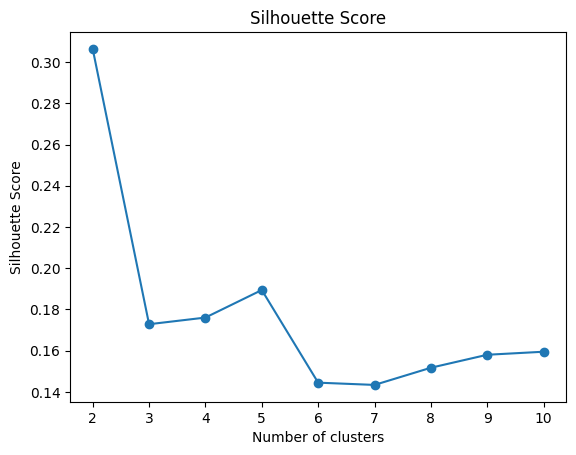

In [191]:
# The image below is not the final result, if yours looks different, that’s okay.
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(df_scaled, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_scaled, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [192]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

In [193]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_inverse['KMeans'] = y_pred
df_inverse['Agglo'] = y_hc

# show the df
df_inverse.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0,1
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0,0


Display the cluster summary in the form of a dataframe.

In [194]:
# Lakukan agregasi
cluster_summary = df_inverse.groupby('Agglo').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)':  ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
})

# Menampilkan hasil
cluster_summary


Area Category           Luas Tanah (m2)                             \
               mode  min  max            mean         std    min     max   
Agglo                                                                      
0               2.0  1.0  4.0      511.848485  244.704987  170.0  1561.0   
1               2.0  1.0  4.0      163.090361   81.519198   34.0   450.0   
2               3.0  2.0  4.0      119.026316   89.201640   14.0   420.0   

      Luas Bangunan (m2)                            Jumlah Kamar             \
                    mean         std    min     max         mode  min   max   
Agglo                                                                         
0             572.484848  229.526083  120.0  1200.0          5.0  3.0  13.0   
1             218.156627  100.404996   50.0   600.0          4.0  2.0   8.0   
2             107.131579   69.677608   14.0   300.0          2.0  1.0   5.0   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
Agglo                                                          
0                    5.0  2.0  13.0             2.0  1.0  4.0  
1                    4.0  1.0   7.0             2.0  1.0  3.0  
2                    1.0  1.0   4.0             1.0  1.0  2.0

In [195]:
# Lakukan agregasi
cluster_summary = df_inverse.groupby('Agglo').agg({
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

# Menampilkan hasil
cluster_summary


Harga Penawaran (dari Owner)                                           \
                              mean           std          min           max   
Agglo                                                                         
0                     1.383303e+10  1.448072e+10  325000000.0  9.900000e+10   
1                     3.094804e+09  2.060152e+09  645000000.0  1.450000e+10   
2                     1.548517e+09  1.712632e+09  160000000.0  1.050000e+10   

      Terjual/Belum Arah Hadap Rumah Posisi Rumah  \
               mode             mode         mode   
Agglo                                               
0               1.0              3.0          2.0   
1               1.0              3.0          2.0   
2               1.0              3.0          2.0   

      Lebar Jalan Depan Rumah (ROW)  
                               mode  
Agglo                                
0                               2.0  
1                               2.0  
2                               2.0

In [196]:
# Menghitung jumlah data di setiap klaster
cluster_counts = df_inverse['Agglo'].value_counts().sort_index()

cluster_counts

,count
Agglo,
0,66
1,166
2,76


In [197]:
# write down your interpretation from the cluster that you have been made
# Cluster 0:
# Area Category: Mode is 2.0, indicating that the most common area category in Cluster 0 is 2.
# Luas Tanah (Land Area): The average land area in Cluster 0 is relatively small (187.38 m²), with a minimum of 50.0 m² and a maximum of 525.0 m². This suggests that Cluster 0 is associated with smaller plots of land.
# Luas Bangunan (Building Area): The mean building area in Cluster 0 is 243.81 m², which is also moderate compared to other clusters.
# Jumlah Kamar (Number of Rooms): Mode is 4, indicating that houses in Cluster 0 typically have 4 rooms.
# Jumlah Kamar Mandi (Number of Bathrooms): The most common number of bathrooms is 4, with a minimum of 1 and maximum of 7.
# Tingkat/Lantai (Floors): The mode is 2 floors, with a range between 1 and 3 floors, indicating mid-sized homes in terms of vertical space.
# Harga Penawaran (Offer Price): The average offer price is around 3.54 billion, but it can go as low as 645 million and as high as 19.5 billion, showing a large price range.
# Terjual/Belum (Sold/Not Sold): The mode is 1 (Sold), meaning most properties in this cluster have been sold.
# Arah Hadap Rumah (House Orientation): The most common house orientation is 3, indicating a standard facing direction for homes in this cluster.
# Posisi Rumah (House Position): Mode is 2, indicating a particular positioning style that is prevalent across this cluster.
# Lebar Jalan Depan Rumah (Road Width): The mode is 2, meaning that the average road width in front of homes is 2 meters.

# Cluster 1:
# Area Category: Mode is 1.0, indicating that Cluster 1 primarily contains homes in area category 1.
# Luas Tanah (Land Area): Cluster 1 has much larger land areas on average (570.68 m²) with a minimum of 240.0 m² and a maximum of 1,561.0 m², suggesting larger properties in this cluster.
# Luas Bangunan (Building Area): The average building area is 642.22 m², which is significantly larger than in Cluster 0, further supporting the idea that Cluster 1 contains more spacious homes.
# Jumlah Kamar (Number of Rooms): The mode is 5 rooms, which indicates that homes in this cluster are typically larger in terms of room count.
# Jumlah Kamar Mandi (Number of Bathrooms): Mode is 5, with a broader range for bathrooms (from 2 to 13), suggesting that homes in Cluster 1 are luxurious and have more facilities.
# Tingkat/Lantai (Floors): Mode is 2, indicating homes with 2 floors, but the range goes up to 4 floors.
# Harga Penawaran (Offer Price): The average price is significantly higher at 16.76 billion, with a very wide range, suggesting that these homes are in the higher price bracket.
# Terjual/Belum (Sold/Not Sold): The mode is 1 (Sold), indicating most homes in this cluster have been sold.
# Arah Hadap Rumah (House Orientation): The mode remains the same as Cluster 0, which is 3, indicating that orientation is not a distinguishing factor.
# Posisi Rumah (House Position): Mode is 2, similar to Cluster 0.
# Lebar Jalan Depan Rumah (Road Width): Mode is 3, indicating wider roads in front of homes compared to Cluster 0.

# Cluster 2:
# Area Category: Mode is 3.0, meaning most homes in Cluster 2 belong to area category 3.
# Luas Tanah (Land Area): The land area in Cluster 2 is smaller than in Cluster 1 (118.98 m²), with a minimum of 14.0 m² and a maximum of 495.0 m², indicating smaller plots of land.
# Luas Bangunan (Building Area): Cluster 2's average building area is 117.59 m², suggesting that the homes here are generally smaller in size.
# Jumlah Kamar (Number of Rooms): Mode is 2 rooms, which is fewer than in Clusters 0 and 1, indicating smaller homes.
# Jumlah Kamar Mandi (Number of Bathrooms): Mode is 2, with a range of 1 to 4 bathrooms, showing a more modest offering compared to the other clusters.
# Tingkat/Lantai (Floors): The mode is [1.0, 2.0], indicating variability in floor count. Some homes in this cluster have one floor, while others have two.
# Harga Penawaran (Offer Price): The average price in Cluster 2 is lower at 1.51 billion, which is consistent with the smaller size and land area of the homes.
# Terjual/Belum (Sold/Not Sold): The mode is 1 (Sold), so most homes in Cluster 2 have also been sold.
# Arah Hadap Rumah (House Orientation): The mode remains the same at 3, showing consistency in orientation.
# Posisi Rumah (House Position): Mode is 2, indicating a similar positioning as in the other clusters.
# Lebar Jalan Depan Rumah (Road Width): Mode is 2, similar to Cluster 0, which suggests that homes in Cluster 2 are located on roads with standard widths.

# Cluster Summary
# - Cluster 0: High-end, large properties with high prices, suitable for affluent buyers in premium areas.
# - Cluster 1: Mid-range properties with moderate land and building sizes, aimed at middle-income buyers in suburban or mid-density areas.
# - Cluster 2: Budget-friendly, smaller properties with lower prices, suitable for buyers with limited budgets in compact, high-density areas.


**Hierarchical Visualization**

Single Linkage

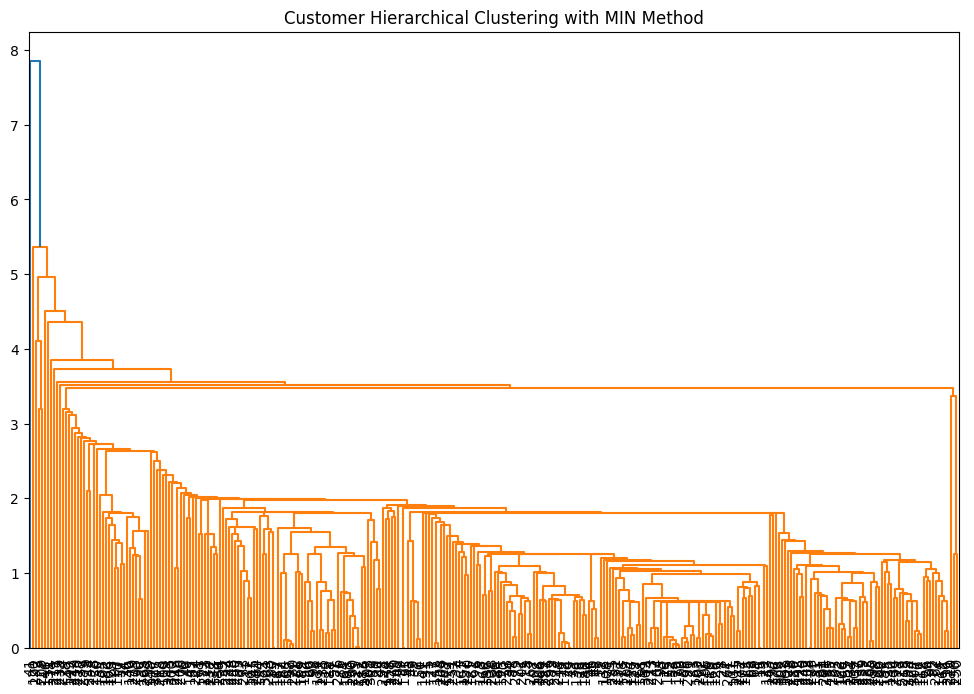

In [198]:
# Membuat linkage menggunakan data yang sudah diskalakan
single_linkage = linkage(df_scaled, method='single')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(
    single_linkage,
    labels=list(range(1, len(df_scaled) + 1)),
)

plt.title('Customer Hierarchical Clustering with MIN Method')
plt.xticks(fontsize=10, rotation=90)
plt.show()

complete linkage

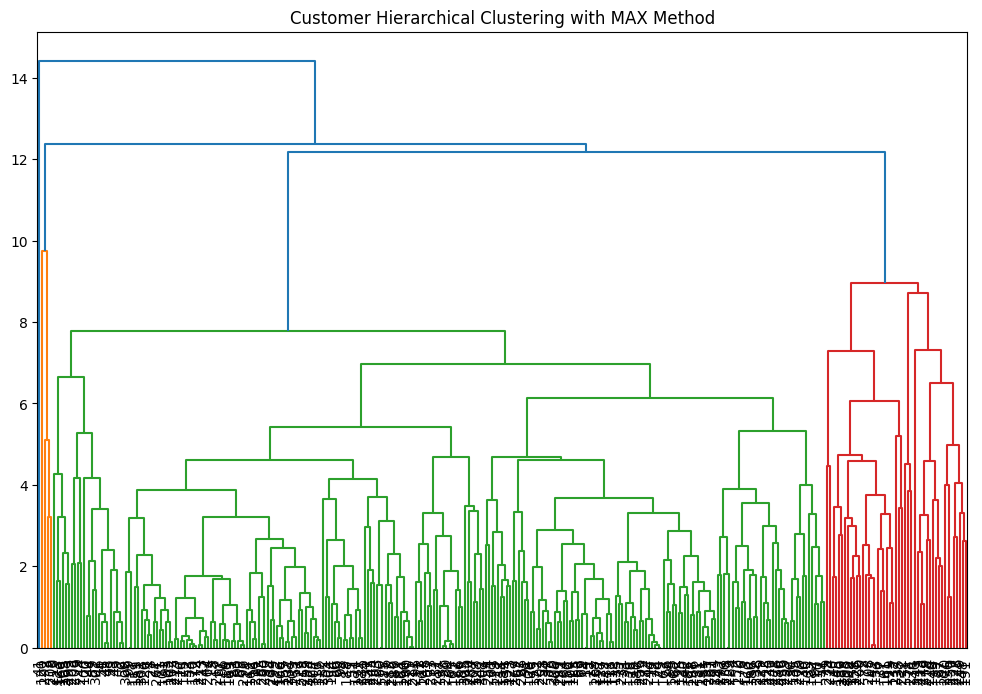

In [199]:
complete_linkage = linkage(df_scaled, method='complete')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(
    complete_linkage,
    labels=list(range(1, len(df_scaled) + 1)),
)

# Menambahkan judul dan label pada dendrogram
plt.title('Customer Hierarchical Clustering with MAX Method')
plt.xticks(fontsize=10, rotation=90)
plt.show()

average linkage

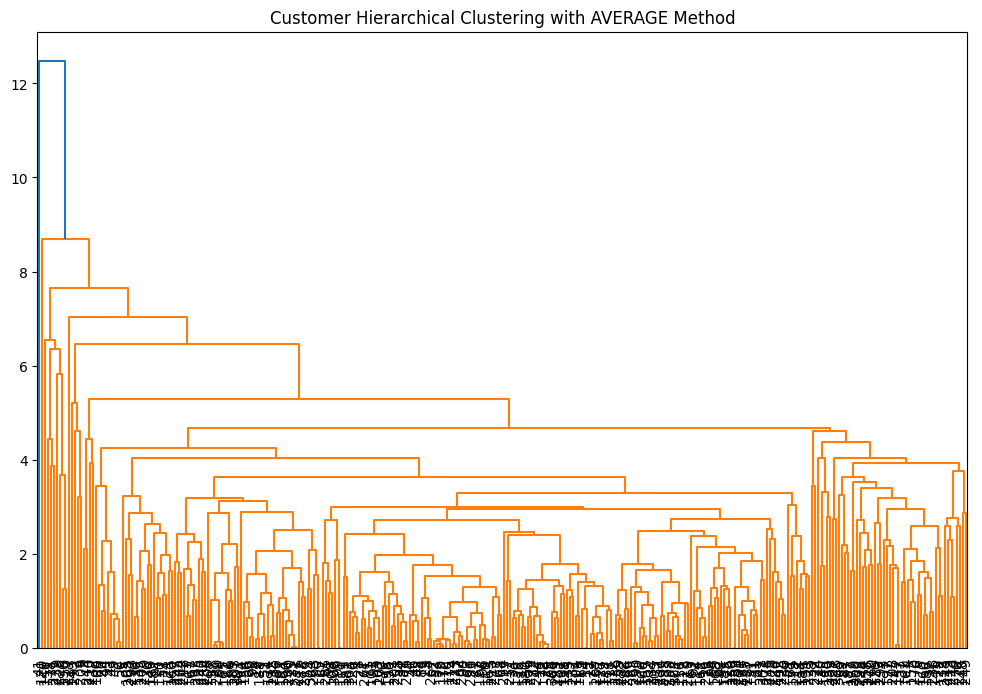

In [200]:
average_linkage = linkage(df_scaled, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(
    average_linkage,
    labels=list(range(1, len(df_scaled) + 1)),
)

plt.title('Customer Hierarchical Clustering with AVERAGE Method')
plt.xticks(fontsize=10, rotation=90)
plt.show()

ward method

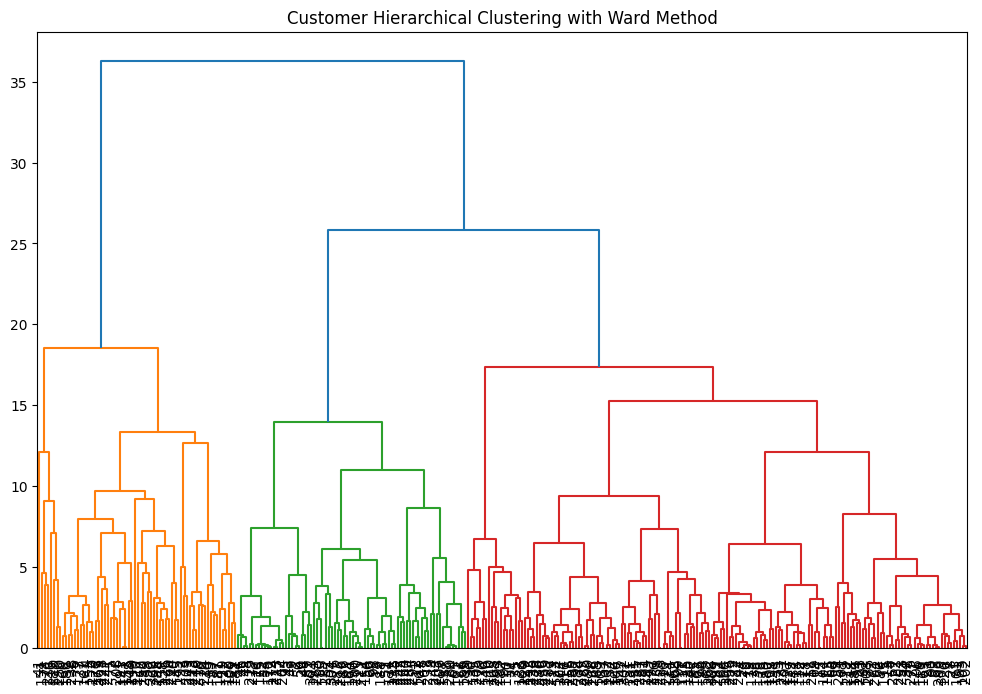

In [201]:
ward_linkage = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(
    ward_linkage,
    labels=list(range(1, len(df_scaled) + 1)),
)

plt.title('Customer Hierarchical Clustering with Ward Method')
plt.xticks(fontsize=10, rotation=90)
plt.show()